1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [348]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [349]:
data = pd.read_csv('air_data.csv', sep = ';')
data.head(3)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE


##   Знакомство с данными

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


## Предобработка данных

In [351]:
# Приведите заголовки к удобному виду
data.columns = ['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount', 'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag', 'sale_type']
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


In [352]:
# Проверьте типы данных
data['issue_date'] = pd.to_datetime(data['issue_date'], format = '%Y-%m-%d')

In [353]:
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'], format = '%Y-%m-%d')
data.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE


In [354]:
# Обработайте пропуски
data.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [356]:
data['ffp_flag'] = data['ffp_flag'].fillna('not_paticipant')

In [357]:
data['ffp_flag'] = data['ffp_flag'].map({'FFP': True, 'not_paticipant': False})
data['ffp_flag'] = data['ffp_flag'].astype(bool)
data.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           50000 non-null  bool          
 8   sale_type          50000 non-null  object        
dtypes: bool(1), datetime64[ns](2), int64(1), object(5)
memory usage: 3.1+ MB


In [359]:
data['dest_city_code'].unique()

array(['KGD', 'OVB', 'MOW', 'KRR', 'DUS', 'PEE', 'AER', 'NJC', 'KUF',
       'UUD', 'HEL', 'LED', 'ABA', 'EVN', 'GDZ', 'KZN', 'MRV', 'SIP',
       'SKG', 'FEG', 'MQF', 'VOG', 'HKT', 'CEK', 'RTW', 'IKT', 'ULY',
       'NUX', 'TOF', 'DXB', 'YKS', 'KHV', 'UUS', 'BQS', 'SVX', 'PKC',
       'SGC', 'IJK', 'OGZ', 'AAQ', 'MMK', 'UFA', 'KJA', 'KIV', 'NOZ',
       'BAK', 'CGN', 'ROV', 'NER', 'EGO', 'KEJ', 'TLK', 'VIE', 'BAX',
       'PEZ', 'HTA', 'STW', 'GDX', 'VVO', 'AYT', 'RGK', 'VRN', 'TAS',
       'BLQ', 'TOX', 'BTK', 'NSK', 'OSS', 'GOJ', 'ASF', 'SSH', 'DYU',
       'OMS', 'VOZ', 'SEL', 'FRU', 'LBD', 'MCX', 'HAJ', 'MJZ', 'PFO',
       'HRG', 'BOJ', 'GRV', 'DYR', 'IWA', 'NOJ', 'NYM', 'NVI', 'KQT',
       'RKT', 'UGC', 'TJM', 'HMA', 'BER', 'PWQ', 'BKK', 'LPK', 'INN',
       'NMA', 'KSQ', 'LWN', 'MSQ', 'KVK', 'REN', 'IKU', 'TJU', 'BHK',
       'AUH', 'VAR', 'NQZ', 'ATH', 'ROM', 'LCA', 'TLV', 'UKK', 'BZK',
       'PYJ', 'PUY', 'ALC', 'DOH', 'RIX', 'KXK', 'SLY', 'PAR', 'NBC',
       'SKD', 'MUC',

In [360]:
data['orig_city_code'] = data['orig_city_code'].fillna('not_defined')

In [361]:
data['dest_city_code'] = data['dest_city_code'].fillna('not_defined')

In [362]:
data.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [363]:
# Проверьте наличие дубликатов
data.duplicated().sum()

169

In [364]:
data.loc[data.duplicated(keep=False)]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
337,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,True,ONLINE
338,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,True,ONLINE
649,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,False,OFFLINE
670,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,False,OFFLINE
716,2022-02-08,2022-08-01,AD,360,MMK,MOW,ВВЛ,False,OFFLINE
...,...,...,...,...,...,...,...,...,...
49360,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,True,ONLINE
49424,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,True,ONLINE
49677,2022-04-02,2022-05-02,AD,470,NUX,MOW,ВВЛ,False,ONLINE
49968,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,False,OFFLINE


In [365]:
data = data.drop_duplicates().reset_index(drop=True)

In [366]:
data.duplicated().sum()

0

In [367]:
data

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE
...,...,...,...,...,...,...,...,...,...
49826,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,False,ONLINE
49827,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,False,OFFLINE
49828,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,True,ONLINE
49829,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,False,OFFLINE


In [368]:
# Исключите нулевые значения в выручке для дальнейшего исследования
data['revenue_amount'].unique()

array([ 200,  610,  390,  190,  250,   70,  490,  280,  360,  380,  210,
          0,  370, 1090,  470,  450,  300,  180,  570,  430,  350,  130,
        230,  290,  160,  420,  690,  340,  310,  520,  440,  400,  930,
        240,  170,  270,  150,  560,  260,  220,  680, 1820,  410,  630,
        550,  840,  110,  140,  100,  640,  720,  460,  120,  540,  330,
       1030,   40,  320,  530,  820,   50,  480,  960,  500,  760, 2000,
        810,  670,  790,  950,  590,  600,  510,  710,  830, 1140,  620,
        750,  770, 1200, 1110,  970, 1180,  740,  650,  730,  660,  800,
        860,  890,  920,  580,  700,  880,  850,  940, 1070,  910, 1690,
        870, 1930,  780, 2990, 1780,  980, 1620,   60,   90, 1150, 1160,
       1040,  900, 1760, 1320,   80, 1020, 2270,  990, 1260, 1080, 1940,
       1060, 1280, 1190, 1470, 1810, 1520, 1010, 1000, 1360, 1340, 1220,
       1980, 1530, 1330, 2300, 1450, 1630, 1510, 2060, 1590, 1120, 1500,
       1860, 1250, 1050, 1660, 1460, 1610, 2050, 11

In [369]:
data = data.loc[data['revenue_amount'] != 0].reset_index(drop = True)
data

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE
...,...,...,...,...,...,...,...,...,...
49360,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,False,ONLINE
49361,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,False,OFFLINE
49362,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,True,ONLINE
49363,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,False,OFFLINE


In [370]:
data['revenue_amount'].unique()

array([ 200,  610,  390,  190,  250,   70,  490,  280,  360,  380,  210,
        370, 1090,  470,  450,  300,  180,  570,  430,  350,  130,  230,
        290,  160,  420,  690,  340,  310,  520,  440,  400,  930,  240,
        170,  270,  150,  560,  260,  220,  680, 1820,  410,  630,  550,
        840,  110,  140,  100,  640,  720,  460,  120,  540,  330, 1030,
         40,  320,  530,  820,   50,  480,  960,  500,  760, 2000,  810,
        670,  790,  950,  590,  600,  510,  710,  830, 1140,  620,  750,
        770, 1200, 1110,  970, 1180,  740,  650,  730,  660,  800,  860,
        890,  920,  580,  700,  880,  850,  940, 1070,  910, 1690,  870,
       1930,  780, 2990, 1780,  980, 1620,   60,   90, 1150, 1160, 1040,
        900, 1760, 1320,   80, 1020, 2270,  990, 1260, 1080, 1940, 1060,
       1280, 1190, 1470, 1810, 1520, 1010, 1000, 1360, 1340, 1220, 1980,
       1530, 1330, 2300, 1450, 1630, 1510, 2060, 1590, 1120, 1500, 1860,
       1250, 1050, 1660, 1460, 1610, 2050, 1100, 15

## Исследовательский анализ данных

In [371]:
data.describe()

,revenue_amount
count,49365.000000
mean,437.631723
std,214.604891
min,10.000000
25%,290.000000
50%,400.000000
75%,550.000000
max,5200.000000


In [372]:
# Создаем отчет о динамике продаж по дате покупки билетов
data_by_issue_date = data.groupby('issue_date').agg({'revenue_amount': 'sum'}).reset_index()
data_by_issue_date

,issue_date,revenue_amount
0,2021-10-01,60310
1,2021-10-02,33100
2,2021-10-03,34320
3,2021-10-04,58190
4,2021-10-05,60800
...,...,...
360,2022-09-26,39520
361,2022-09-27,48350
362,2022-09-28,44860
363,2022-09-29,27460


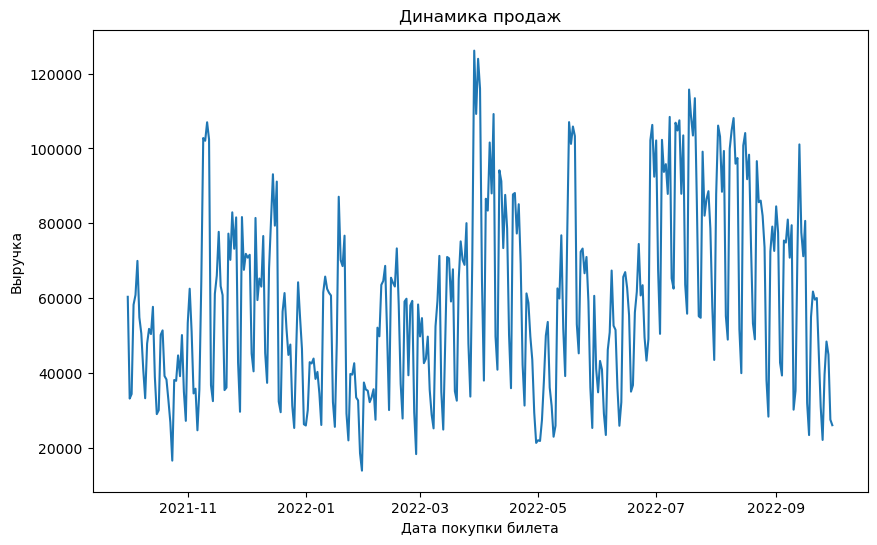

In [373]:
# Строим линейный график динамики продаж
plt.figure(figsize=(10, 6))
sns.lineplot(data = data_by_issue_date, x = 'issue_date', y = 'revenue_amount')
plt.title('Динамика продаж')
plt.xlabel('Дата покупки билета')
plt.ylabel('Выручка')
plt.show()

 <div class="alert alert-block alert-success">По графику можно заметить, что больше всего продаж было в апреле, а меньше всего в феврале. <br>В конце лета и середине весны билеты покупают активнее, чем в конце осени, зимой и в начале лета.

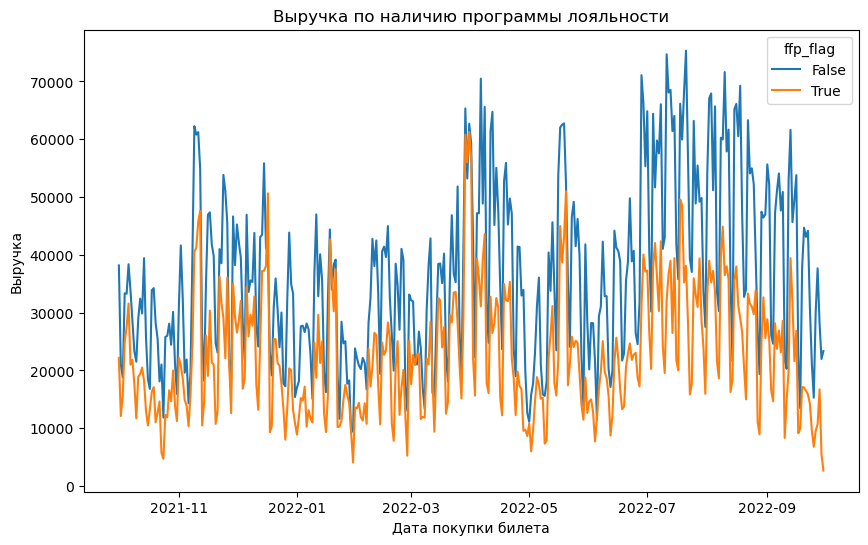

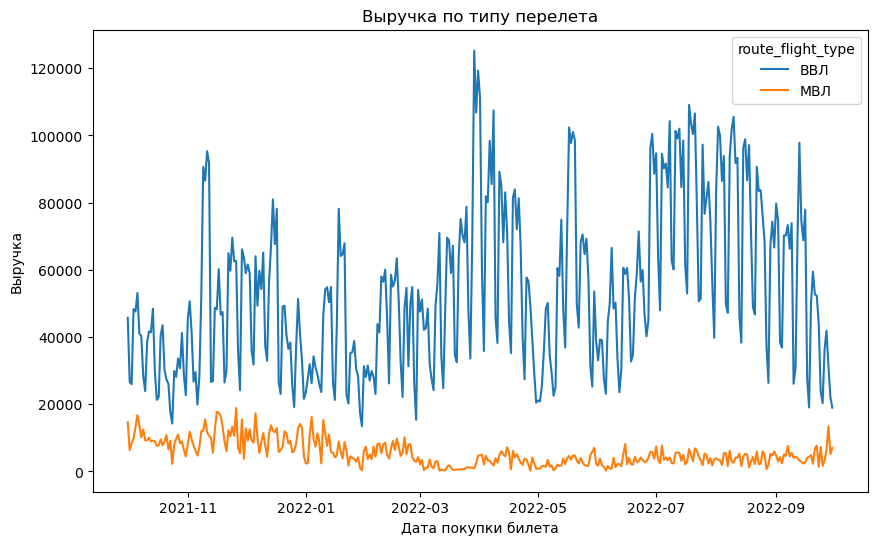

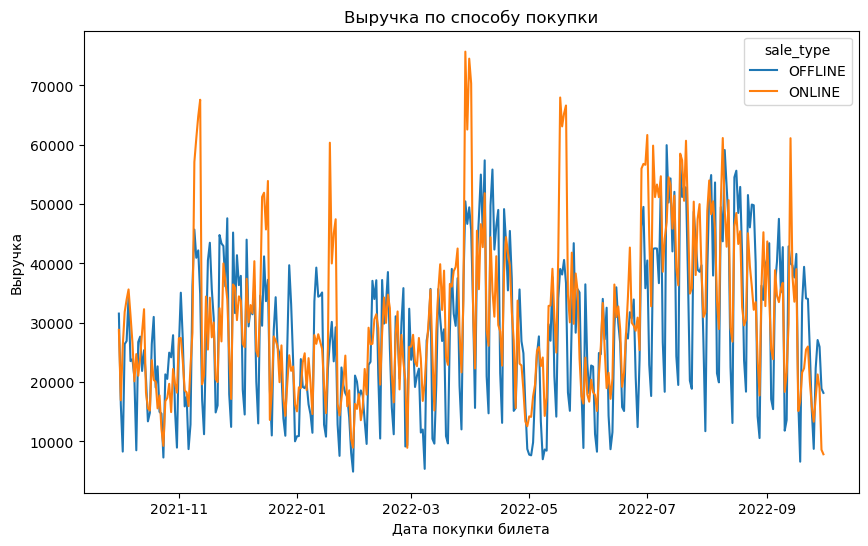

In [374]:
# Строим отчеты с детализацией по полям ffp_flag, route_flight_type и  sale_type
names = {'ffp_flag': 'наличию программы лояльности', 'route_flight_type': 'типу перелета', 'sale_type': 'способу покупки' }

for col in names.keys():
    data_grouped = data.groupby([col, 'issue_date']).agg({'revenue_amount': 'sum'}).reset_index()
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data = data_grouped, x = 'issue_date', y = 'revenue_amount', hue = col)
    plt.title(f'Выручка по {names[col]}')
    plt.xlabel('Дата покупки билета')
    plt.ylabel('Выручка')
    plt.legend(title=col)
    plt.show()

### По графикам можно увидеть:
    1. На протяжении всего года больше покупают билетов пассажиры, у которых нет программы лояльности.
    2. Значительно больше выручки авиакомпания получает с продажи билетов на внутренние рейсы, чем на международные (в несколько раз больше).
    3. Примерно одинаковая выручка идет с онлайн и офлайн продаж, но иногда возникают "скачки" онлайн продаж.

 <div class="alert alert-block alert-info">Строим общие отчеты по типам

In [375]:
# По типам пассажиров
data_pax_type = data.groupby('pax_type').agg({'revenue_amount': 'sum'}).reset_index()
data_pax_type

,pax_type,revenue_amount
0,AD,20260530
1,CHD,1333430
2,INF,9730


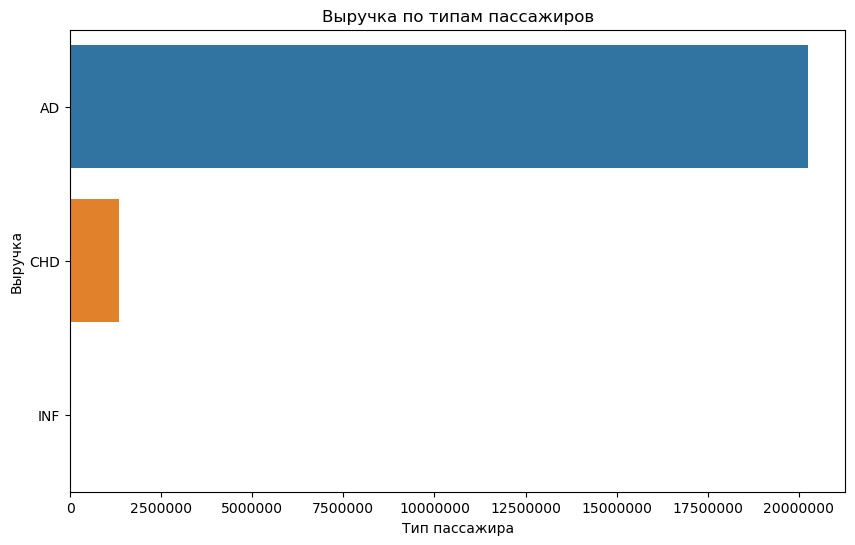

In [376]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_pax_type, x='revenue_amount', y='pax_type', orient='h').set(title='Выручка по типам пассажиров', xlabel='Тип пассажира', ylabel='Выручка')
plt.ticklabel_format(axis='x', style = 'plain')
plt.show()

<div class="alert alert-block alert-success">По диаграмме видно, что почти все пассажиры из категории "взрослый" (более 20 млн человек), есть немного детей (около 1.3 млн человек), несущественное количество "не определено". <br>Это связано с тем, что взрослые чаще совершают перелеты, а дети не имеют самостоятельного допуска на борт самолета.

In [377]:
# По типам перелета
data_route = data.groupby('route_flight_type').agg({'revenue_amount': 'sum'}).reset_index()
data_route

,route_flight_type,revenue_amount
0,ВВЛ,19610480
1,МВЛ,1993210


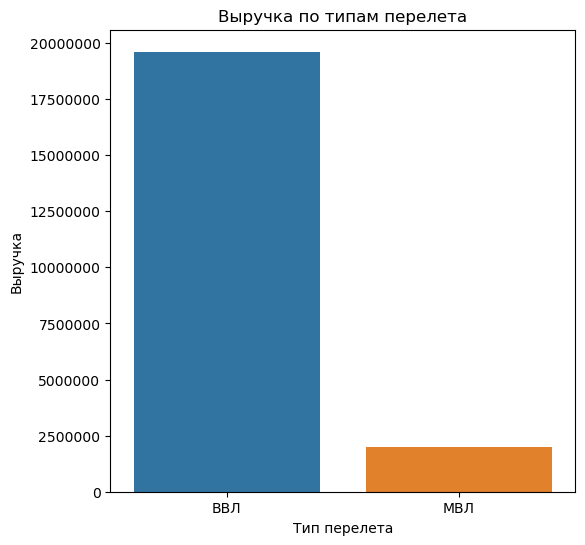

In [378]:
plt.figure(figsize=(6, 6))
sns.barplot(data=data_route, x='route_flight_type', y='revenue_amount').set(title='Выручка по типам перелета', xlabel='Тип перелета', ylabel='Выручка')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

<div class="alert alert-block alert-success">По типу перелета выручка за внуренние перелеты в несколько раз больше выручки с международних перелетов. <br>Скорее всего это обусловленно тем, что сейчас в нашей стране в принципе преобладают внутренние перелеты над международными из-за санкций.

In [379]:
# По способам покупки
data_sale_type = data.groupby('sale_type').agg({'revenue_amount': 'sum'}).reset_index()
data_sale_type

,sale_type,revenue_amount
0,OFFLINE,10317780
1,ONLINE,11285910


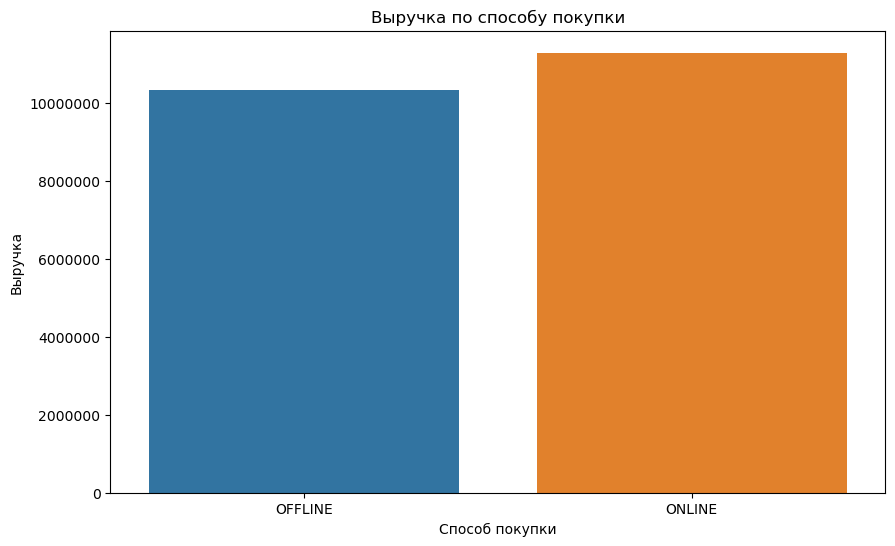

In [380]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_sale_type, x='sale_type', y='revenue_amount').set(title='Выручка по способу покупки', xlabel='Способ покупки', ylabel='Выручка')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

<div class="alert alert-block alert-success">По способу покупки наибольшая выручка приходится с онлайн покупок. <br>Современные технологии значительно упростили процесс покупки авиабилетов, сделав его более удобным для пользователей. Онлайн-платформы позволяют клиентам сравнивать цены, выбирать лучшие варианты по времени и маршруту, а также совершать покупку буквально в несколько кликов.

In [381]:
# По наличии программы лояльности
data_ffp = data.groupby('ffp_flag').agg({'revenue_amount': 'sum'}).reset_index()
data_ffp

,ffp_flag,revenue_amount
0,False,13381300
1,True,8222390


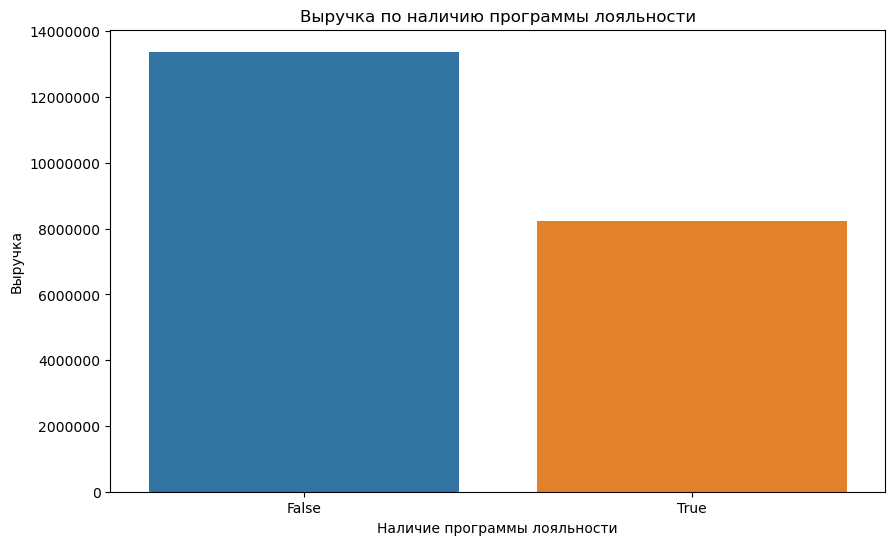

In [382]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_ffp, x='ffp_flag', y='revenue_amount').set(title='Выручка по наличию программы лояльности', xlabel='Наличие программы лояльности', ylabel='Выручка')
plt.ticklabel_format(axis='y', style = 'plain')
plt.show()

<div class="alert alert-block alert-success">Большее количество выручки приходит на людей, которые не участвуют в программе лояльности. <br>Это может быть обусловлено тем, что кто-то покупает билеты впервые, также не все пассажиры выбирают билеты конкретной авиакомпании, а просто те, которые дешевле. 

 <div class="alert alert-block alert-info">3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
 

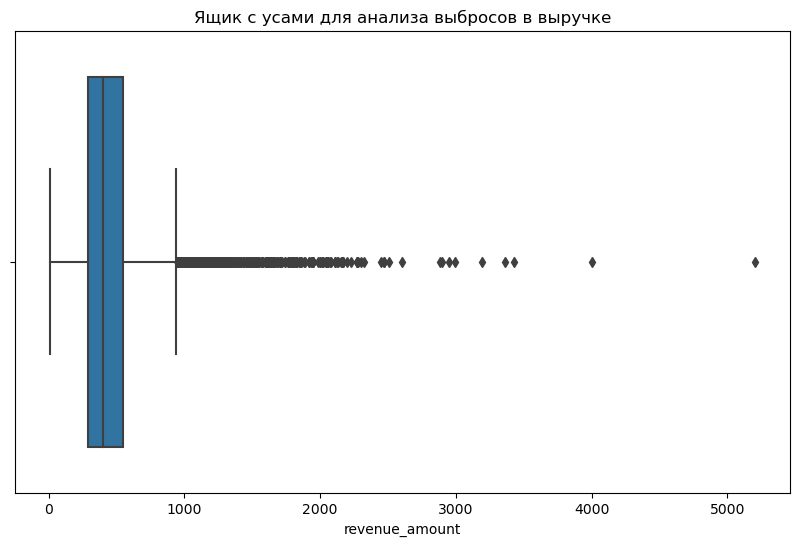

In [383]:
# Построение ящика с усами (boxplot) для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['revenue_amount'])
plt.title('Ящик с усами для анализа выбросов в выручке')
plt.show()

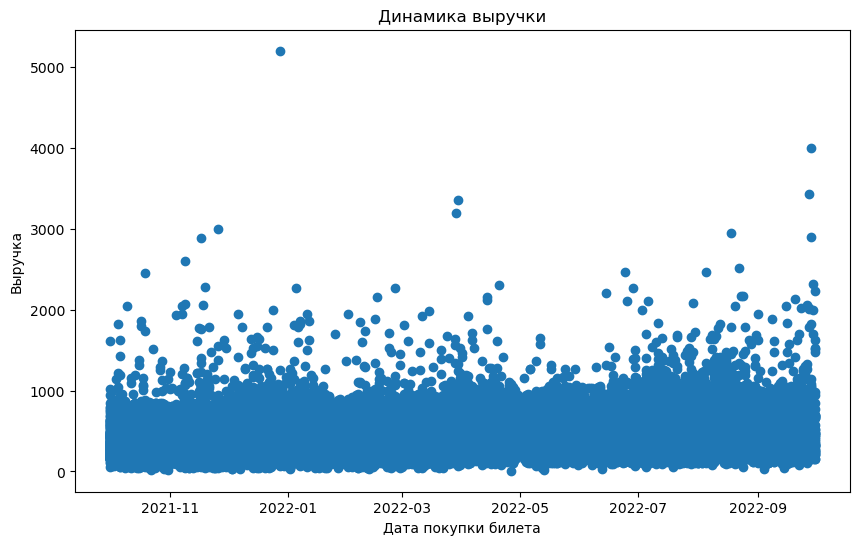

In [384]:
# Построение графика для анализа динамики выручки
plt.figure(figsize=(10, 6))
plt.scatter(data['issue_date'], data['revenue_amount'])
plt.title('Динамика выручки')
plt.xlabel('Дата покупки билета')
plt.ylabel('Выручка')
plt.show()

In [385]:
# Вычисление межквартильного размаха (IQR)
Q1 = data['revenue_amount'].quantile(0.25)
Q3 = data['revenue_amount'].quantile(0.75)
IQR = Q3 - Q1

In [386]:
# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [387]:
upper_bound

940.0

In [388]:
data.sort_values(by='revenue_amount', ascending=False)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
26743,2021-12-28,2021-12-29,AD,5200,MOW,PEE,ВВЛ,False,OFFLINE
19313,2022-09-28,2022-09-29,AD,4000,MOW,IST,МВЛ,True,OFFLINE
19267,2022-09-27,2022-09-29,AD,3430,MOW,EVN,МВЛ,False,ONLINE
38552,2022-03-30,2022-03-31,AD,3360,MOW,UUD,ВВЛ,False,OFFLINE
9537,2022-03-29,2022-04-08,AD,3190,NSK,MOW,ВВЛ,False,OFFLINE
...,...,...,...,...,...,...,...,...,...
38234,2021-12-03,2021-12-20,AD,30,VVO,OVB,ВВЛ,False,ONLINE
36211,2021-10-31,2021-11-11,AD,20,IKT,VVO,ВВЛ,False,OFFLINE
43808,2021-10-22,2021-11-05,CHD,20,KRR,MOW,ВВЛ,False,ONLINE
34603,2022-05-13,2022-05-14,AD,20,MMK,MOW,ВВЛ,False,ONLINE


In [389]:
# Выведем выбросы
outliers = data[~((data['revenue_amount'] >= lower_bound) & (data['revenue_amount'] <= upper_bound))]
outliers

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
14,2022-01-07,2022-01-15,AD,1090,GDZ,MOW,ВВЛ,False,OFFLINE
79,2022-01-07,2022-01-08,AD,1820,OVB,KHV,ВВЛ,False,OFFLINE
117,2021-12-06,2022-01-15,AD,1030,BKK,KHV,МВЛ,True,OFFLINE
164,2021-12-12,2022-01-04,AD,960,MOW,AER,ВВЛ,False,ONLINE
213,2021-12-24,2022-01-02,AD,2000,IKT,MOW,ВВЛ,False,OFFLINE
...,...,...,...,...,...,...,...,...,...
48994,2021-10-16,2021-12-20,AD,1310,VVO,HKT,МВЛ,True,ONLINE
49100,2022-04-15,2022-05-04,AD,960,HTA,MOW,ВВЛ,False,OFFLINE
49191,2022-04-08,2022-05-21,AD,970,VVO,OVB,ВВЛ,True,OFFLINE
49334,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,False,OFFLINE


In [390]:
# Считаем процент выбросов от общего количсетво строк в датасете
outlier_percentage = len(outliers) / len(data['revenue_amount']) * 100
print(round(outlier_percentage, 3), '%')

1.999 %


<div class="alert alert-block alert-success"> Выбросы составляют всего 2%, для минимализации потерь я приняла решение удалить два самых больших выброса (5200 и 4000)

In [391]:
# Удаляю два выброса
data = data[data['revenue_amount'] < 4000]

In [392]:
data.sort_values(by='revenue_amount', ascending=False)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
19267,2022-09-27,2022-09-29,AD,3430,MOW,EVN,МВЛ,False,ONLINE
38552,2022-03-30,2022-03-31,AD,3360,MOW,UUD,ВВЛ,False,OFFLINE
9537,2022-03-29,2022-04-08,AD,3190,NSK,MOW,ВВЛ,False,OFFLINE
901,2021-11-26,2021-11-29,AD,2990,VVO,HKT,МВЛ,False,OFFLINE
10123,2022-08-18,2022-08-21,AD,2950,HTA,MOW,ВВЛ,False,OFFLINE
...,...,...,...,...,...,...,...,...,...
38234,2021-12-03,2021-12-20,AD,30,VVO,OVB,ВВЛ,False,ONLINE
36211,2021-10-31,2021-11-11,AD,20,IKT,VVO,ВВЛ,False,OFFLINE
43808,2021-10-22,2021-11-05,CHD,20,KRR,MOW,ВВЛ,False,ONLINE
34603,2022-05-13,2022-05-14,AD,20,MMK,MOW,ВВЛ,False,ONLINE


<div class="alert alert-block alert-info">3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

In [393]:
#  Добавляем столбец с месяцами для удобства
data['month'] = pd.to_datetime(data['issue_date']).dt.month
data.head(1)

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_52932/3332870562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['issue_date']).dt.month


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12


In [394]:
# Cоздаем словарь с номером месяца и его названием
dct_months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь',
              10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}

In [395]:
# Заменяем номер месяца на его название с помощью replace
data['month'] = data['month'].replace(dct_months)
data.head(1)

/var/folders/lb/cd5v5t1n0f38khmnw5v1brv40000gp/T/ipykernel_52932/317313217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['month'].replace(dct_months)


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,Декабрь


In [396]:
# Cоздаем список месяцев
lst_months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [397]:
# Cоздаем датафрейм, где подсчитана сумма выручки и количество продаж в каждом месяце
month_revenue_amount = pd.DataFrame(data.groupby('month')['revenue_amount'].agg(['sum', 'count']), index=lst_months)
month_revenue_amount.head(1)

,sum,count
Январь,1352390,3589


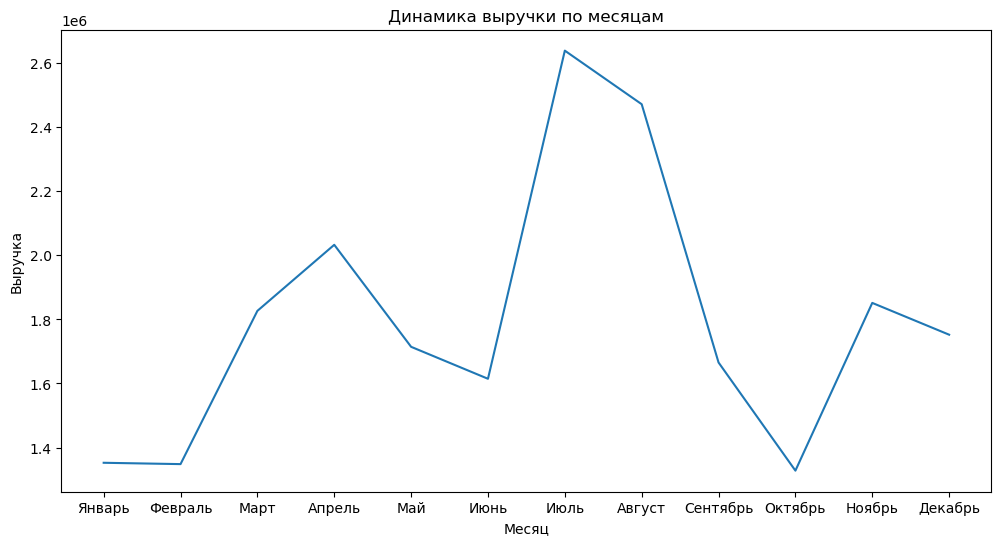

In [398]:
# Строим график динамики выручки по месяцам
plt.figure(figsize=(12, 6))
sns.lineplot(month_revenue_amount['sum']).set(title='Динамика выручки по месяцам', xlabel='Месяц', ylabel='Выручка')
plt.show()

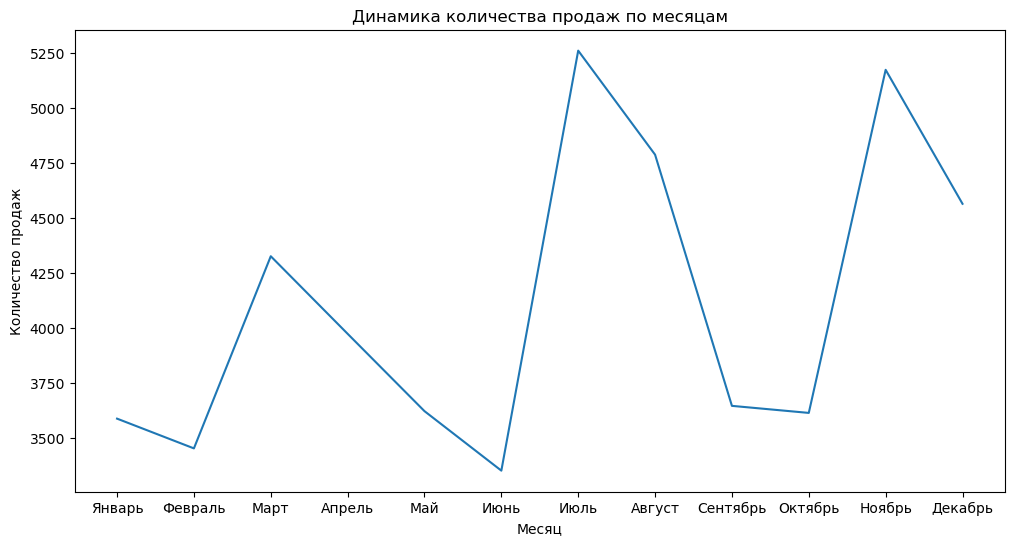

In [399]:
# Строим график динамики количества продаж 
plt.figure(figsize=(12, 6))
sns.lineplot(month_revenue_amount['count']).set(title='Динамика количества продаж по месяцам', xlabel='Месяц', ylabel='Количество продаж')
plt.show()

<div class="alert alert-block alert-success">Наибольшая выручка пришлась на июль, а наименьшая на ноябрь.


<div class="alert alert-block alert-info">Проверка гипотезы о различиях выручки осенью и зимой


In [400]:
# Разделение данных по сезонам
autumn_revenue = data[data['month'].isin(['Сентябрь', 'Октябрь', 'Ноябрь'])][['month', 'revenue_amount']].reset_index(drop=True)
winter_revenue = data[data['month'].isin(['Декабрь', 'Январь', 'Февраль'])][['month', 'revenue_amount']].reset_index(drop=True)

In [401]:
autumn_revenue.head(1)

,month,revenue_amount
0,Ноябрь,390


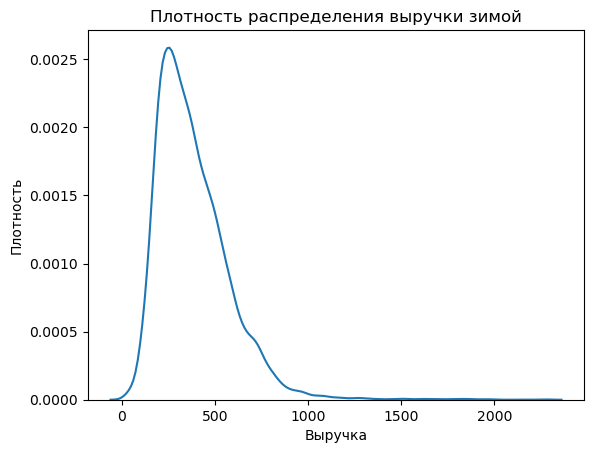

In [402]:
# Построим график плотности, чтобы проверить нормальное ли распределение
sns.kdeplot(winter_revenue['revenue_amount']).set(title='Плотность распределения выручки зимой', xlabel='Выручка', ylabel='Плотность')
plt.show()

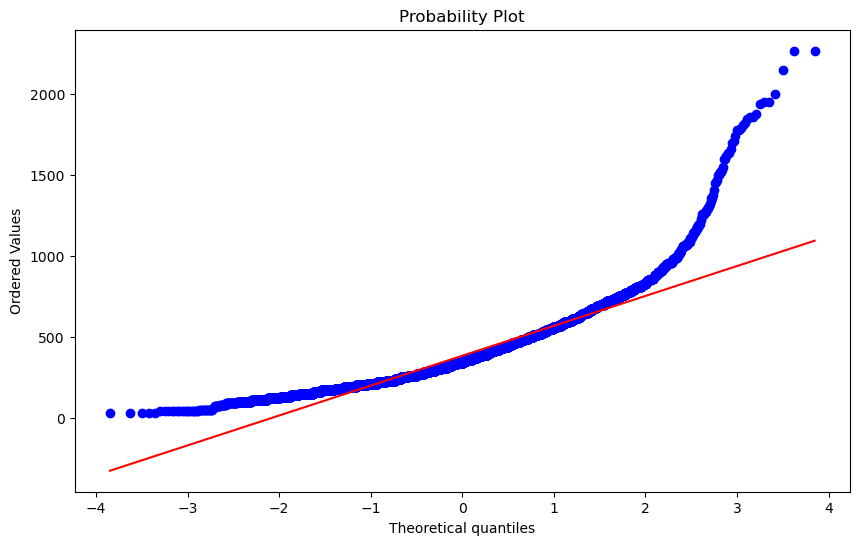

In [403]:
# Построим Q-Q plot 
plt.figure(figsize=(10,6))
st.probplot(winter_revenue['revenue_amount'], dist='norm', plot=plt)
plt.show()

In [404]:
# Проведем статистический тест Шапиро-Уилка
stat, p = st.shapiro(winter_revenue['revenue_amount'])
alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборочная совокупность НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборочная совокупность имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборочная совокупность НЕ имеет нормального распределения


/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Делаем тоже самое с осенью.

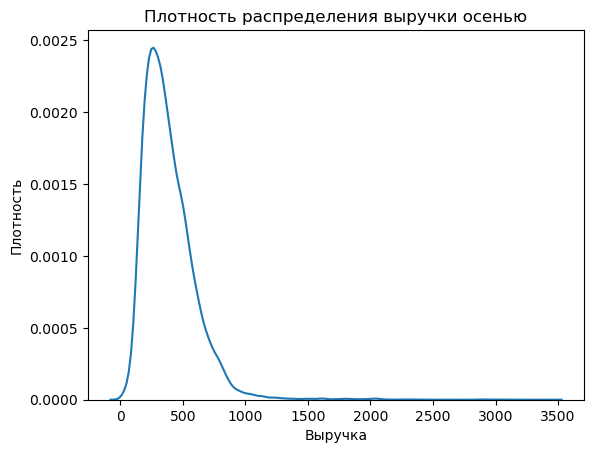

In [405]:
# Построим график плотности, чтобы проверить нормальное ли распределение
sns.kdeplot(autumn_revenue['revenue_amount']).set(title='Плотность распределения выручки осенью', xlabel='Выручка', ylabel='Плотность')
plt.show()

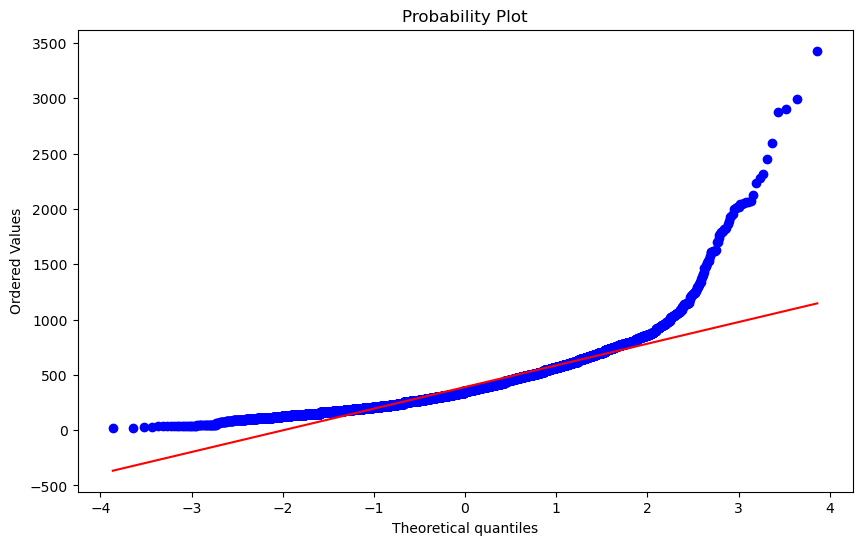

In [406]:
# Построим Q-Q plot 
plt.figure(figsize=(10,6))
st.probplot(autumn_revenue['revenue_amount'], dist='norm', plot=plt)
plt.show()

In [407]:
# проведем статистический тест Шапиро-Уилка
stat, p = st.shapiro(autumn_revenue['revenue_amount'])
alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборочная совокупность имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения


/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [408]:
# Выборки независимы, имеют больше 30 наблюдений. По ЦПТ выборка может и не иметь нормального распредения, как в нашем случае
alpha = 0.05
res = st.ttest_ind(winter_revenue['revenue_amount'], autumn_revenue['revenue_amount'])
print('pvalue -', res.pvalue)
print('Следует отвергнуть нулевую гипотезу. Выручка зимой и осенью отличается' if res.pvalue < alpha else 'Не удалось отвергнуть нулевую гипотезу. Выручка зимой и осенью НЕ отличается')

pvalue - 0.02406018366344257
Следует отвергнуть нулевую гипотезу. Выручка зимой и осенью отличается


<div class="alert alert-block alert-info">Исследование корреляции между выручкой и количеством продаж

In [409]:
monthly_revenue = data.groupby('month')['revenue_amount'].sum().reset_index()
monthly_sales = data.groupby('month')['sale_type'].count().reset_index()

In [410]:
data_month = pd.merge(monthly_revenue, monthly_sales, on='month')
data_month

,month,revenue_amount,sale_type
0,Август,2471260,4787
1,Апрель,2032570,3974
2,Декабрь,1752050,4564
3,Июль,2638430,5259
4,Июнь,1614500,3353
5,Май,1714240,3623
6,Март,1826430,4326
7,Ноябрь,1851260,5172
8,Октябрь,1327840,3615
9,Сентябрь,1665310,3647


In [411]:
# Рассчитываем корреляцию Пирсона между выручкой и количеством продаж
correlation = data_month['revenue_amount'].corr(data_month['sale_type'])

print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.7775686842035204


In [412]:
# Интерпретация
if correlation > 0.7:
    print("Сильная положительная корреляция между выручкой и количеством продаж.")
elif 0.3 < correlation <= 0.7:
    print("Умеренная положительная корреляция.")
elif 0 < correlation <= 0.3:
    print("Слабая положительная корреляция.")
else:
    print("Отрицательная корреляция.")

Сильная положительная корреляция между выручкой и количеством продаж.


Другой способ!!!

In [413]:
# Переводим все данные в числовой числовой код, так как имеются категориальные переменные
data_month_factorize = data[['revenue_amount', 'month']].apply(lambda x: pd.factorize(x)[0])
data_month_factorize.head(3)

,revenue_amount,month
0,0,0
1,1,0
2,2,1


In [414]:
# Строим матрицу корреляций, используя ранговую корреляцию Кендалла, который позволяет работать с категориальными переменными, их проранжировав
month_corr_matrix = data_month_factorize.corr(method='kendall')
month_corr_matrix

,revenue_amount,month
revenue_amount,1.000000,0.039974
month,0.039974,1.000000


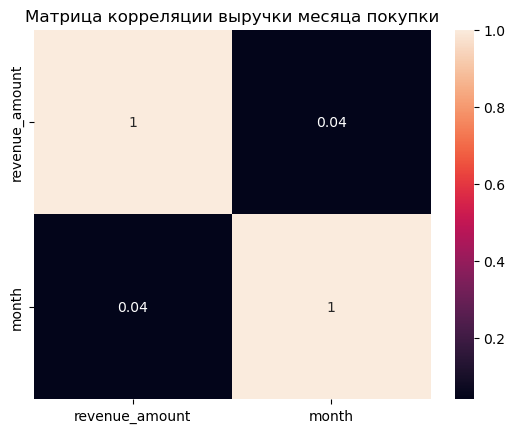

In [415]:
# Визуализируем
sns.heatmap(month_corr_matrix, annot=True)
plt.title('Матрица корреляции выручки месяца покупки')
plt.show()

<div class="alert alert-block alert-info"> 
Вывод: Связь между показателями отсутствует.

<div class="alert alert-block alert-info">3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.


In [416]:
# Cоздадим столбец с периодом между покупкой и вылетом
data = data.assign(days_before_flight = data['flight_date_loc'] - data['issue_date'])
data.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,Декабрь,35 days
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,Декабрь,3 days
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,Ноябрь,37 days


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49363 entries, 0 to 49364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   issue_date          49363 non-null  datetime64[ns] 
 1   flight_date_loc     49363 non-null  datetime64[ns] 
 2   pax_type            49363 non-null  object         
 3   revenue_amount      49363 non-null  int64          
 4   orig_city_code      49363 non-null  object         
 5   dest_city_code      49363 non-null  object         
 6   route_flight_type   49363 non-null  object         
 7   ffp_flag            49363 non-null  bool           
 8   sale_type           49363 non-null  object         
 9   month               49363 non-null  object         
 10  days_before_flight  49363 non-null  timedelta64[ns]
dtypes: bool(1), datetime64[ns](2), int64(1), object(6), timedelta64[ns](1)
memory usage: 4.2+ MB


In [423]:
# Cоздаем функцию, которая будет классифицировать пассажиров
def classify_passengers(value):
    if value.days <= 7:
        return 'Покупка за менее чем 7 дней'
    elif 7 < value.days <= 30:
        return 'Покупка от 7 до 30 дней'
    elif value.days > 30:
        return 'Покупка за более чем 30 дней'

In [424]:
# Создаем столбец с типом пассажиров, использую функцию выше и apply
data['passenger_type'] = data['days_before_flight'].apply(classify_passengers)
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight,passenger_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,Декабрь,35 days,Покупка за более чем 30 дней


In [425]:
# Подсчитываем для каждого типа пассажира сумму выручки и количество покупок
passenger_type_revenue = data.groupby('passenger_type')['revenue_amount'].agg(['sum', 'count']).reset_index()
passenger_type_revenue

,passenger_type,sum,count
0,Покупка за более чем 30 дней,4414070,9876
1,Покупка за менее чем 7 дней,9428590,21769
2,Покупка от 7 до 30 дней,7751830,17718


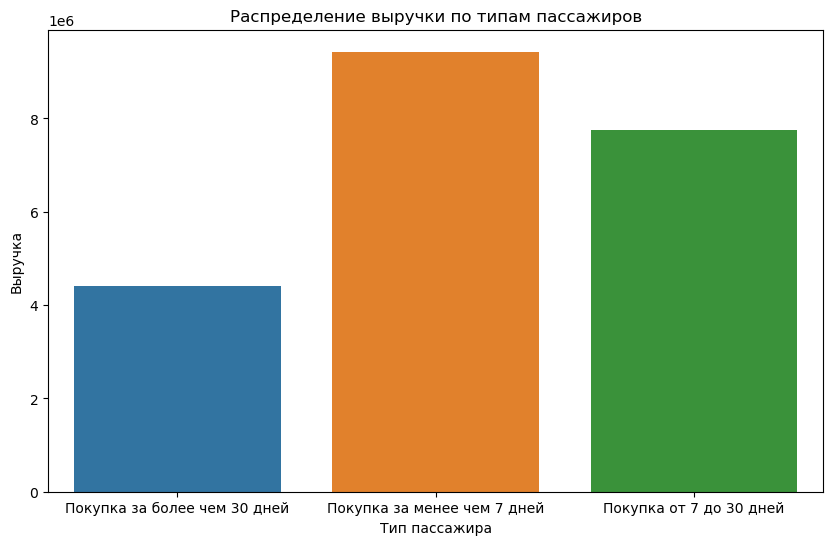

In [426]:
#визуализируем
plt.figure(figsize=(10, 6))
sns.barplot(passenger_type_revenue, x='passenger_type', y='sum').set(title='Распределение выручки по типам пассажиров', xlabel='Тип пассажира', ylabel='Выручка')
plt.show()

<b><a class="anchor" id="6.4.2"></a><div class="alert alert-block alert-success">Проверка гипотезы, что выручка от продажи билетов для двух групп клиентов по разнице между датой покупки и датой перелета отличается</b>

In [427]:
one_week_revenue = data[data['passenger_type'] == 'Покупка за менее чем 7 дней'][['passenger_type', 'revenue_amount']].reset_index(drop=True)
one_week_revenue.head(1)

,passenger_type,revenue_amount
0,Покупка за менее чем 7 дней,610


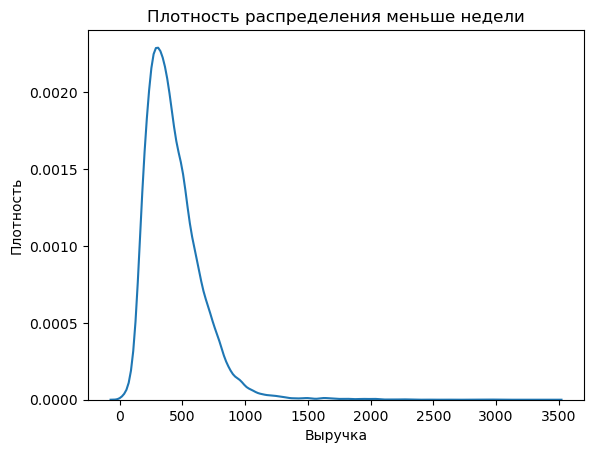

In [428]:
# Построим график плотности, чтобы проверить нормальное ли распределение
sns.kdeplot(one_week_revenue['revenue_amount']).set(title='Плотность распределения меньше недели', xlabel='Выручка', ylabel='Плотность')
plt.show()

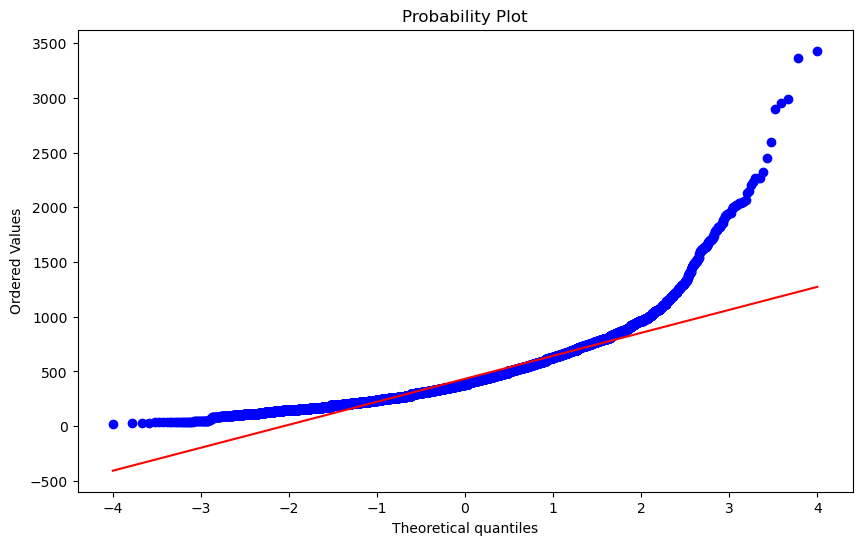

In [429]:
# Построим Q-Q plot 
plt.figure(figsize=(10,6))
st.probplot(one_week_revenue['revenue_amount'], dist='norm', plot=plt)
plt.show()

In [430]:
#проведем статистический тест Шапиро-Уилка
stat, p = st.shapiro(one_week_revenue['revenue_amount'])
alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборочная совокупность имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения


/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [432]:
three_months_revenue = data[data['passenger_type'] == 'Покупка за более чем 30 дней'][['passenger_type', 'revenue_amount']].reset_index(drop=True)
three_months_revenue.head(1)

,passenger_type,revenue_amount
0,Покупка за более чем 30 дней,200


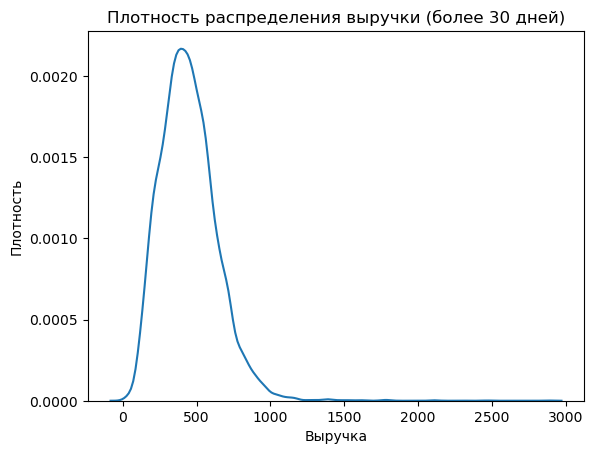

In [433]:
# Построим график плотности, чтобы проверить нормальное ли распределение
sns.kdeplot(three_months_revenue['revenue_amount']).set(title='Плотность распределения выручки (более 30 дней)', xlabel='Выручка', ylabel='Плотность')
plt.show()

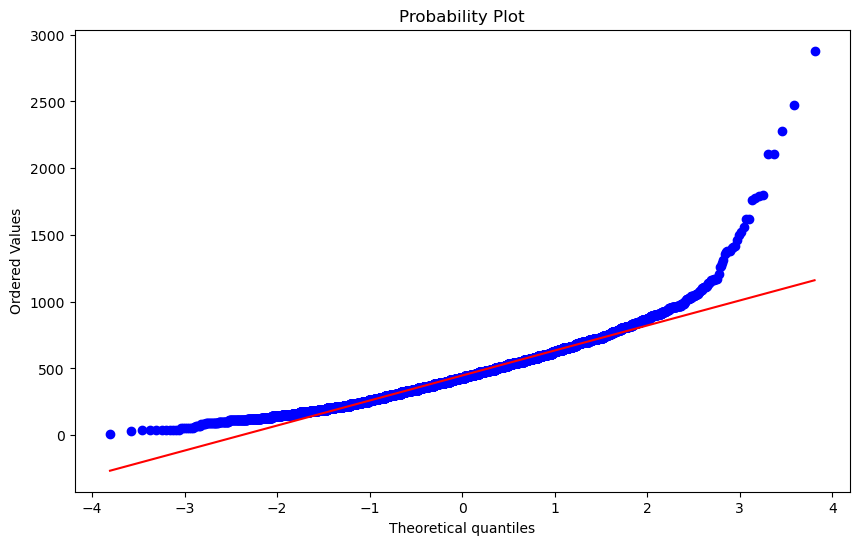

In [434]:
# Построим Q-Q plot 
plt.figure(figsize=(10,6))
st.probplot(three_months_revenue['revenue_amount'], dist='norm', plot=plt)
plt.show()

In [435]:
# Проведем статистический тест Шапиро-Уилка
stat, p = st.shapiro(three_months_revenue['revenue_amount'])
alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборочная совокупность имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборочная НЕ имеет нормального распределения


/Users/snezana/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [437]:
# Выборки независимы, имеют больше 30 наблюдений. По ЦПТ выборка может и не иметь нормального распредения, как в нашем случае
alpha = 0.05
res = st.ttest_ind(one_week_revenue['revenue_amount'], three_months_revenue['revenue_amount'])
print('pvalue -', res.pvalue)
print('Следует отвергнуть нулевую гипотезу. Выручка у двух групп пассажиров отличается.' if res.pvalue < alpha else 'Не удалось отвергнуть нулевую гипотезу. Выручка у двух групп пассажиров НЕ отличается')

pvalue - 1.3409198279216644e-07
Следует отвергнуть нулевую гипотезу. Выручка у двух групп пассажиров отличается.


<div class="alert alert-block alert-success">Вывод по 3.4:
<br> 1. Пассажиры были разбиты на 3 группы: которые покупают билеты меньше, чем за неделю, меньше, чем за месяц, более, чем за месяц.
<br>2.Больше всего выручки получает авикомпания из 3ей группы (люди покупают билеты менее, чем за семь дней), а меньше в 1ой (люди покупают билеты за 30+ дней). <br>Это может быть обусловлено тем, что обычно, чем раньше пассажир хочет купить билеты, тем они дешевле. Также не все люди готовы так заблаговременно планировать свои перелеты. <br>
3. Гипотеза, что выручка от продажи билетов для двух групп клиентов по разнице между датой покупки и датой перелета отличается подтвердилась.


<div class="alert alert-block alert-info"> 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [371]:
df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=['airport_name', 'location', 'country', 'orig_city_code', 'icao_code', 'latitude', 'longitude', 'altitude', 'timezone', 'U', 'region', 'type', 'fly'])
df.head()

,airport_name,location,country,orig_city_code,icao_code,latitude,longitude,altitude,timezone,U,region,type,fly
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698 entries, 1 to 14110
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   airport_name    7698 non-null   object 
 1   location        7649 non-null   object 
 2   country         7698 non-null   object 
 3   orig_city_code  7698 non-null   object 
 4   icao_code       7698 non-null   object 
 5   latitude        7698 non-null   float64
 6   longitude       7698 non-null   float64
 7   altitude        7698 non-null   int64  
 8   timezone        7698 non-null   object 
 9   U               7698 non-null   object 
 10  region          7698 non-null   object 
 11  type            7698 non-null   object 
 12  fly             7698 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 842.0+ KB


In [373]:
df.loc[df['location'].isna()]

,airport_name,location,country,orig_city_code,icao_code,latitude,longitude,altitude,timezone,U,region,type,fly
11794,Minsk Mazowiecki Military Air Base,NaN,Poland,\N,EPMM,52.195499,21.655899,604,\N,\N,\N,airport,OurAirports
11795,Powidz Military Air Base,NaN,Poland,\N,EPPW,52.379398,17.853901,371,\N,\N,\N,airport,OurAirports
11900,King Salman Abdulaziz Airport,NaN,Saudi Arabia,DWD,OEDM,24.449900,44.121201,3026,\N,\N,\N,airport,OurAirports
11901,King Khaled Air Base,NaN,Saudi Arabia,KMX,OEKM,18.297300,42.803501,6778,\N,\N,\N,airport,OurAirports
11921,Asahikawa Airfield,NaN,Japan,\N,RJCA,43.794734,142.365432,377,\N,\N,\N,airport,OurAirports
11923,Utsunomiya Airport,NaN,Japan,\N,RJTU,36.514500,139.871010,334,\N,\N,\N,airport,OurAirports
11924,Jungwon Air Base/Chungju Airport,NaN,South Korea,\N,RKTI,37.030240,127.886353,281,\N,\N,\N,airport,OurAirports
11927,Bislig Airport,NaN,Philippines,BPH,RPMF,8.195950,126.321999,12,\N,\N,\N,airport,OurAirports
11928,Mati National Airport,NaN,Philippines,MXI,RPMQ,6.949091,126.273680,156,\N,\N,\N,airport,OurAirports
11947,Metropolitano Airport,NaN,Venezuela,\N,SVMP,10.133169,-66.787827,574,\N,\N,\N,airport,OurAirports


<div class="alert alert-block alert-warning">В данных 'location' имеются пустые значение, однако из таблицы выше мы видим, что каждое значение соответствует разным аэропортам и не получится заменить.

In [375]:
df = df.dropna()
df.reset_index(drop= True, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   airport_name    7649 non-null   object 
 1   location        7649 non-null   object 
 2   country         7649 non-null   object 
 3   orig_city_code  7649 non-null   object 
 4   icao_code       7649 non-null   object 
 5   latitude        7649 non-null   float64
 6   longitude       7649 non-null   float64
 7   altitude        7649 non-null   int64  
 8   timezone        7649 non-null   object 
 9   U               7649 non-null   object 
 10  region          7649 non-null   object 
 11  type            7649 non-null   object 
 12  fly             7649 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 777.0+ KB


In [376]:
df

,airport_name,location,country,orig_city_code,icao_code,latitude,longitude,altitude,timezone,U,region,type,fly
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7645,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7646,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7647,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [377]:
orig_city = df[['location', 'orig_city_code']]             
orig_city.columns = ['orig_city_name', 'orig_city_code']

orig_city.head()

,orig_city_name,orig_city_code
0,Goroka,GKA
1,Madang,MAG
2,Mount Hagen,HGU
3,Nadzab,LAE
4,Port Moresby,POM


In [378]:
# Добавляем значения в новый объединенный датасет (города отправления)
flight = data.merge(orig_city, on='orig_city_code', how='left')
flight

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight,orig_city_name
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,not_paticipant,ONLINE,12,35,NaN
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,not_paticipant,OFFLINE,12,3,Yuzhno-sakhalinsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,37,Kaliningrad
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,not_paticipant,ONLINE,12,28,Voronezh
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49358,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,not_paticipant,ONLINE,6,11,NaN
49359,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,not_paticipant,OFFLINE,6,14,St. Petersburg
49360,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,6,3,NaN
49361,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,not_paticipant,OFFLINE,6,2,Kazan


In [379]:
orig_city.columns = ['dest_city_name', 'dest_city_code']
orig_city.head()

,dest_city_name,dest_city_code
0,Goroka,GKA
1,Madang,MAG
2,Mount Hagen,HGU
3,Nadzab,LAE
4,Port Moresby,POM


In [380]:
# Добавляем значения в новый объединенный датасет (города назначения)
flight = flight.merge(orig_city, on='dest_city_code', how='left')
flight

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight,orig_city_name,dest_city_name
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,not_paticipant,ONLINE,12,35,NaN,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,not_paticipant,OFFLINE,12,3,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,37,Kaliningrad,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,not_paticipant,ONLINE,12,28,Voronezh,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,35,NaN,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49358,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,not_paticipant,ONLINE,6,11,NaN,Omsk
49359,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,not_paticipant,OFFLINE,6,14,St. Petersburg,NaN
49360,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,6,3,NaN,Kazan
49361,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,not_paticipant,OFFLINE,6,2,Kazan,NaN


In [381]:
flight[['orig_city_name', 'dest_city_name']].isna().sum()

orig_city_name    16188
dest_city_name    16298
dtype: int64

In [382]:
# Посмотрим города без кода
codes = set(flight.query('orig_city_name.isna()')['orig_city_code']) | set(flight.query('dest_city_name.isna()')['dest_city_code'])
codes

{'BAK',
 'BER',
 'BJS',
 'GRV',
 'LON',
 'MIL',
 'MOW',
 'NQZ',
 'OHH',
 'PAR',
 'ROM',
 'SEL',
 'TOX',
 'TYO',
 'not_defined'}

In [383]:
dist = {'BAK': 'Baku', 'BER': 'Berlin', 'GRV': 'Grozny', 'LON': 'London', 'MIL': 'Milan', 'MOW': 'Moscow', 
               'NQZ': 'Astana', 'OHH': 'Okha', 'PAR': 'Paris', 'ROM': 'Rome', 'SEL': 'Seoul', 'TOX': 'Tobolsk', 'TYO': 'Tokyo'}

# Заполним пропуски:
flight['orig_city_name'] = flight['orig_city_name'].fillna(flight['orig_city_code'].map(dist))
flight['dest_city_name'] = flight['dest_city_name'].fillna(flight['dest_city_code'].map(dist))
flight

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight,orig_city_name,dest_city_name
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,not_paticipant,ONLINE,12,35,Moscow,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,not_paticipant,OFFLINE,12,3,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,37,Kaliningrad,Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,not_paticipant,ONLINE,12,28,Voronezh,Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,35,Moscow,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49358,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,not_paticipant,ONLINE,6,11,Moscow,Omsk
49359,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,not_paticipant,OFFLINE,6,14,St. Petersburg,Moscow
49360,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,6,3,Moscow,Kazan
49361,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,not_paticipant,OFFLINE,6,2,Kazan,Moscow


In [384]:
# Создадим столбец с полным маршрутом
flight['route'] = flight['orig_city_name'] + '-' + flight['dest_city_name']
flight

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight,orig_city_name,dest_city_name,route
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,not_paticipant,ONLINE,12,35,Moscow,Kaliningrad,Moscow-Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,not_paticipant,OFFLINE,12,3,Yuzhno-sakhalinsk,Novosibirsk,Yuzhno-sakhalinsk-Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,37,Kaliningrad,Moscow,Kaliningrad-Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,not_paticipant,ONLINE,12,28,Voronezh,Moscow,Voronezh-Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,35,Moscow,Krasnodar,Moscow-Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49358,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,not_paticipant,ONLINE,6,11,Moscow,Omsk,Moscow-Omsk
49359,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,not_paticipant,OFFLINE,6,14,St. Petersburg,Moscow,St. Petersburg-Moscow
49360,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,6,3,Moscow,Kazan,Moscow-Kazan
49361,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,not_paticipant,OFFLINE,6,2,Kazan,Moscow,Kazan-Moscow


In [386]:
# Выведем топ-10 самых популярных авиамаршрутов для ВВЛ (по выручке):
inner_top = flight.loc[flight['route_flight_type'] == 'ВВЛ']
grouped_inner = inner_top.groupby('route').agg({'revenue_amount': 'sum', 'route_flight_type': 'count'}).reset_index()
grouped_inner.sort_values('route_flight_type', ascending=False).head(10)

,route,revenue_amount,route_flight_type
266,Sochi-Moscow,534530,1341
143,Moscow-Sochi,500770,1309
271,St. Petersburg-Moscow,282110,1212
144,Moscow-St. Petersburg,275790,1192
201,Novosibirsk-Moscow,467540,972
130,Moscow-Novosibirsk,460050,956
55,Kazan-Moscow,206390,760
112,Moscow-Kazan,205960,758
148,Moscow-Ufa,210610,708
218,Novosibirsk-Sochi,413700,695


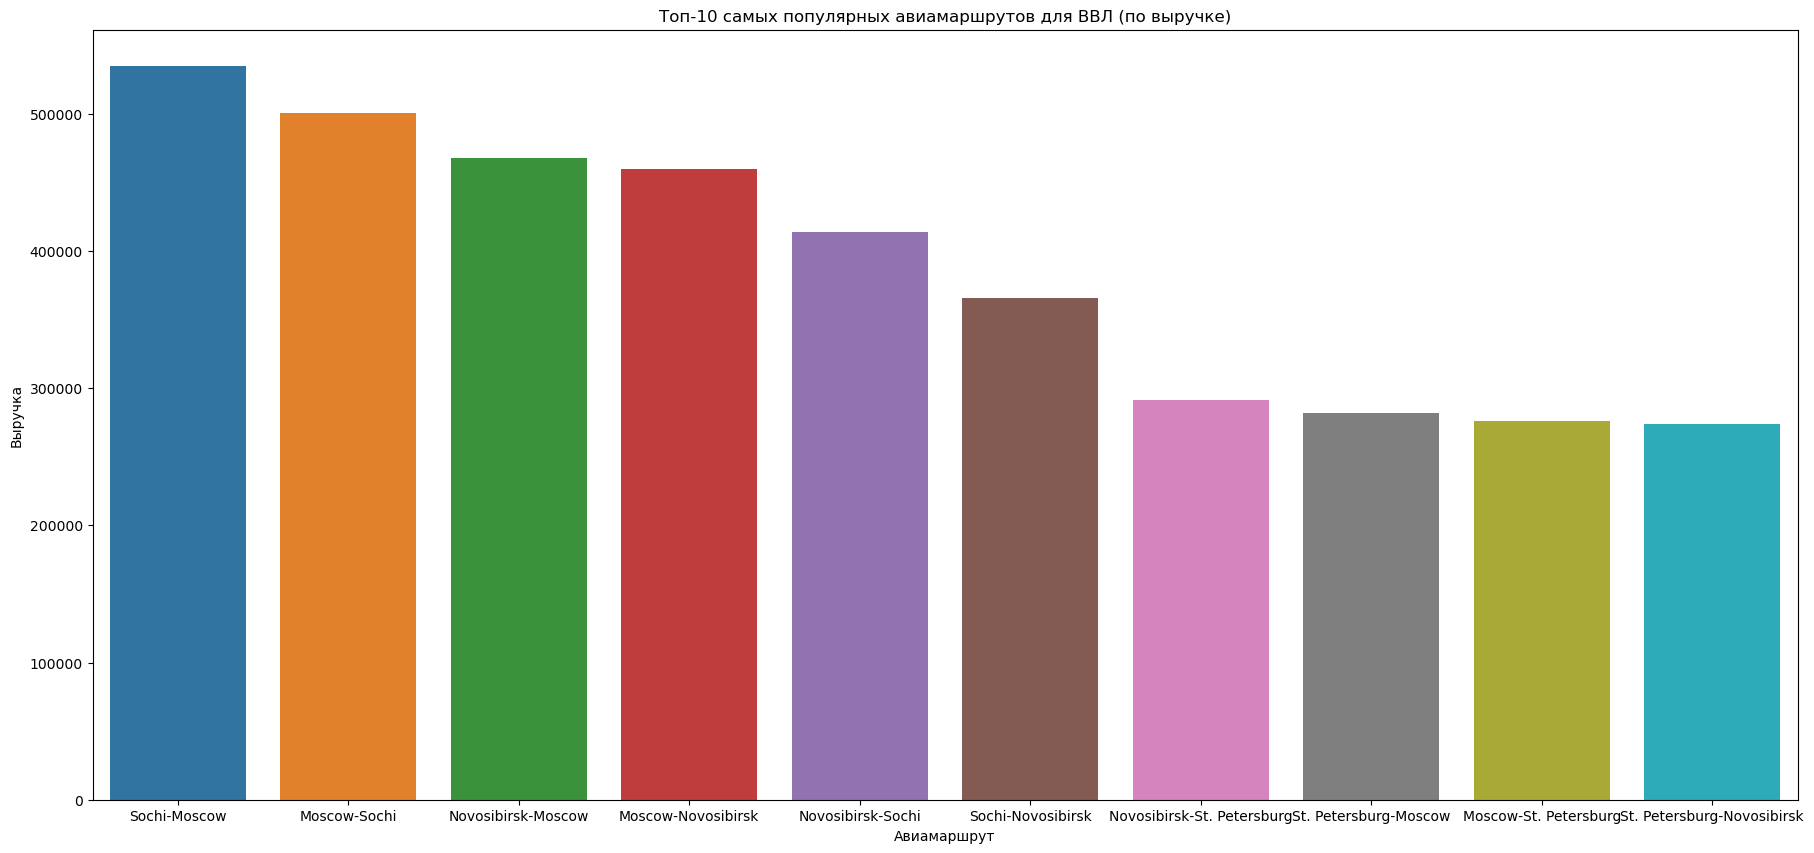

In [391]:
# Визуализируем
plt.figure(figsize = (22, 10))
sns.barplot(data=grouped_inner.sort_values(by='revenue_amount', ascending=False).head(10),
            x='route', 
            y='revenue_amount')
plt.title('Топ-10 самых популярных авиамаршрутов для ВВЛ (по выручке)')
plt.xlabel('Авиамаршрут')
plt.ylabel('Выручка')
plt.show()

In [393]:
# Выведем топ-10 самых популярных авиамаршрутов для ВВЛ (по средней выручке):
inner_top_mean = inner_top.groupby(['route']).agg({'revenue_amount': 'mean', 'route_flight_type': 'count'}).reset_index()
inner_top_mean = inner_top_mean.sort_values('route_flight_type', ascending=False).head(10)
inner_top_mean

,route,revenue_amount,route_flight_type
266,Sochi-Moscow,398.605518,1341
143,Moscow-Sochi,382.559206,1309
271,St. Petersburg-Moscow,232.764026,1212
144,Moscow-St. Petersburg,231.367450,1192
201,Novosibirsk-Moscow,481.008230,972
130,Moscow-Novosibirsk,481.223849,956
55,Kazan-Moscow,271.565789,760
112,Moscow-Kazan,271.715040,758
148,Moscow-Ufa,297.471751,708
218,Novosibirsk-Sochi,595.251799,695


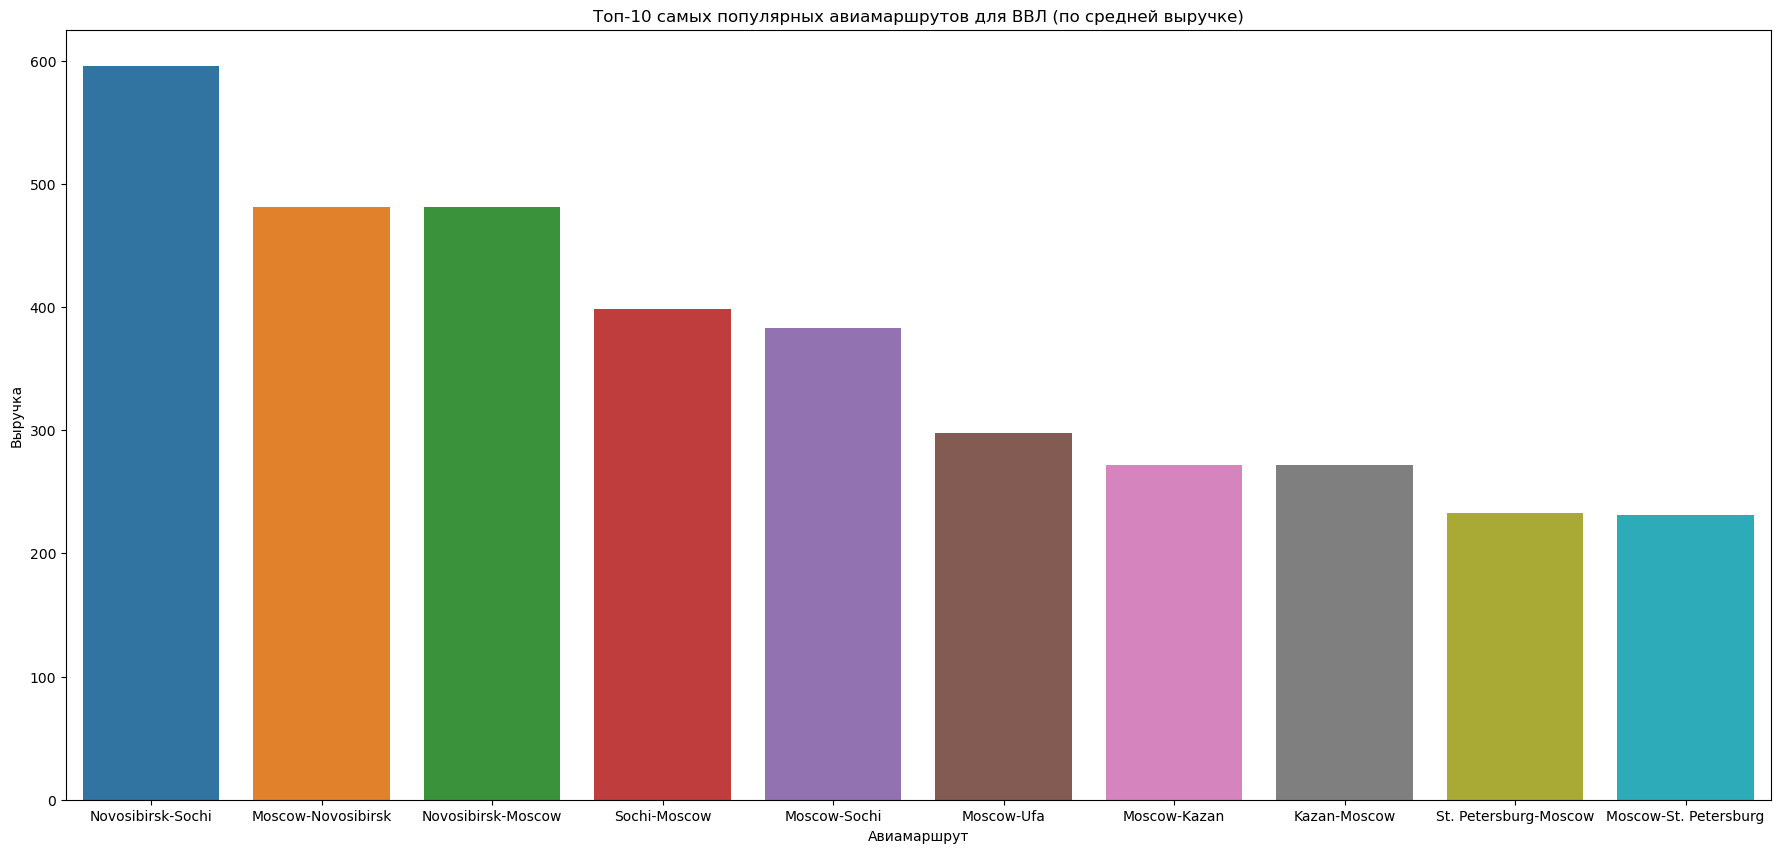

In [396]:
# Визуализируем
plt.figure(figsize = (22, 10))
sns.barplot(data=inner_top_mean.sort_values(by='revenue_amount', ascending=False).head(10),
            x='route', 
            y='revenue_amount')
plt.title('Топ-10 самых популярных авиамаршрутов для ВВЛ (по средней выручке)')
plt.xlabel('Авиамаршрут')
plt.ylabel('Выручка')
plt.show()

<div class="alert alert-block alert-success"> Самыми распространенными рейсам для внутренних перелетов являются: Сочи-Москва, Питер-Москва и обратно. По этим направлениям самая большая выручка, что логично. <br>Новосибирск-Сочи замыкает топ-10, но выручка тоже достаточно высокая (самая высокая по средней). Значит, можно сделать вывод о том, что билеты по этому маршруту дорогие.


In [397]:
# Выведем топ-10 самых популярных авиамаршрутов для МВЛ (по выручке):
outer_top = flight.loc[flight['route_flight_type'] == 'МВЛ']
grouped_outer = outer_top.groupby('route').agg({'revenue_amount': 'sum', 'route_flight_type': 'count'}).reset_index()
grouped_outer.sort_values('route_flight_type', ascending=False).head(10)

,route,revenue_amount,route_flight_type
170,Moscow-Osh,72100,154
102,Khudzhand-Moscow,97160,146
229,Osh-Moscow,80920,136
161,Moscow-Khudzhand,58750,130
214,Novosibirsk-Osh,51930,122
202,Novosibirsk-Bishkek,49040,121
104,Khudzhand-Novosibirsk,57740,116
231,Osh-Novosibirsk,57970,116
141,Moscow-Antalya,46900,107
30,Bishkek-Novosibirsk,48300,102


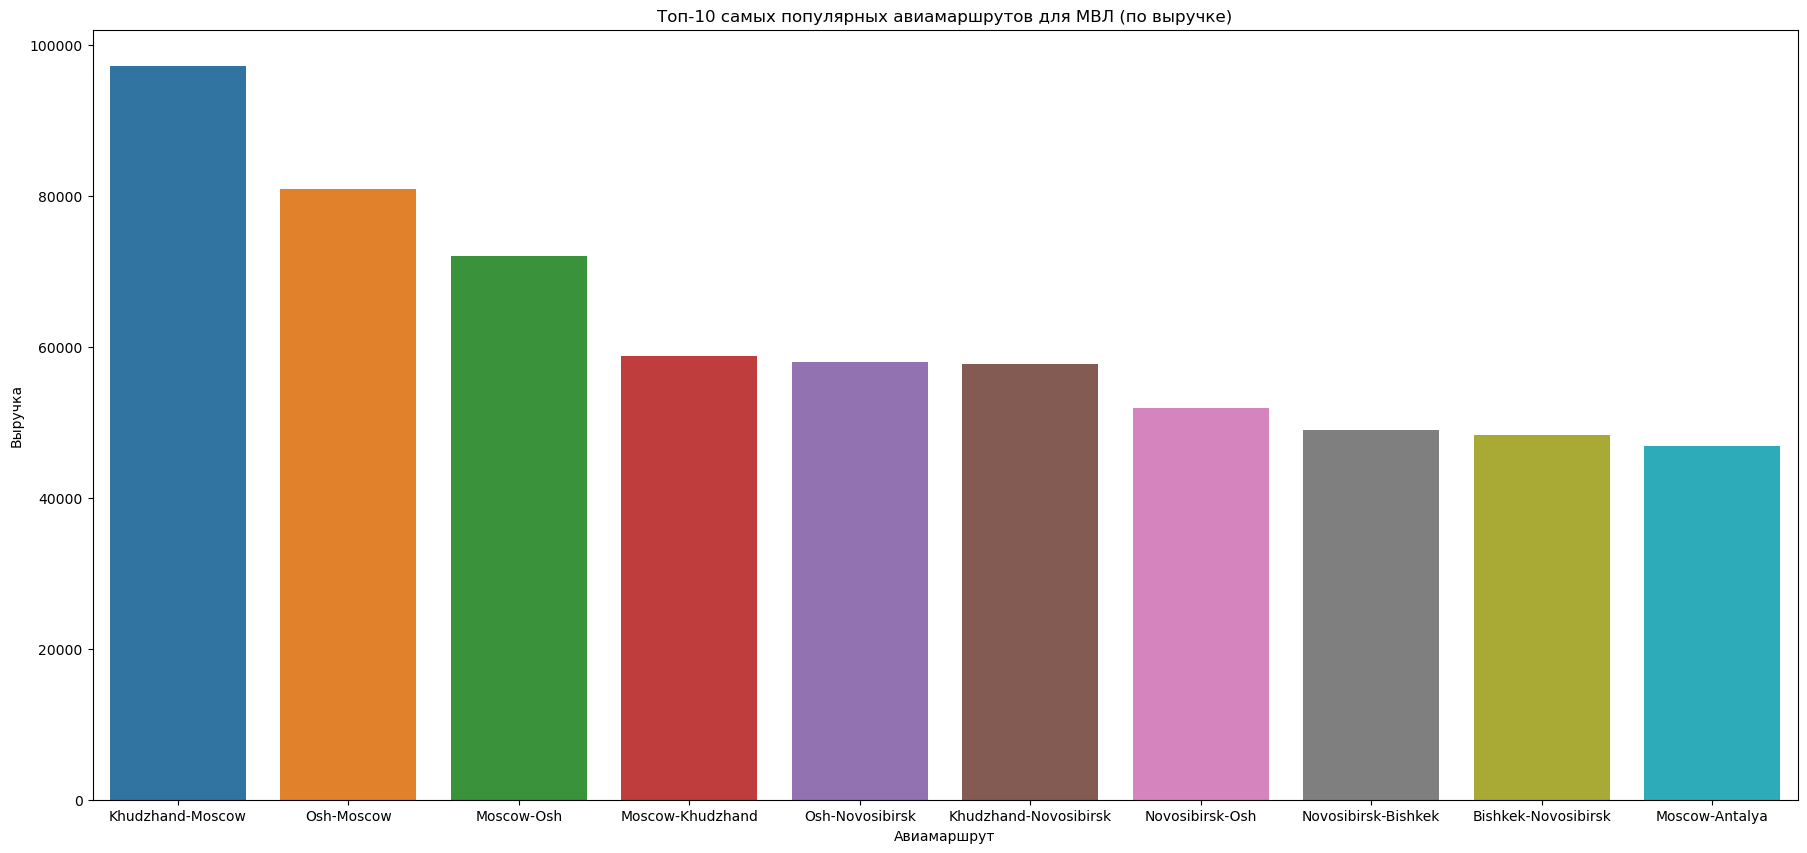

In [398]:
# Визуализируем
plt.figure(figsize = (22, 10))
sns.barplot(data=grouped_outer.sort_values(by='revenue_amount', ascending=False).head(10),
            x='route', 
            y='revenue_amount')
plt.title('Топ-10 самых популярных авиамаршрутов для МВЛ (по выручке)')
plt.xlabel('Авиамаршрут')
plt.ylabel('Выручка')
plt.show()

In [399]:
# Выведем топ-10 самых популярных авиамаршрутов для МВЛ (по средней выручке):
outer_top_mean = outer_top.groupby(['route']).agg({'revenue_amount': 'mean', 'route_flight_type': 'count'}).reset_index()
outer_top_mean = outer_top_mean.sort_values('route_flight_type', ascending=False).head(10)
outer_top_mean

,route,revenue_amount,route_flight_type
170,Moscow-Osh,468.181818,154
102,Khudzhand-Moscow,665.479452,146
229,Osh-Moscow,595.000000,136
161,Moscow-Khudzhand,451.923077,130
214,Novosibirsk-Osh,425.655738,122
202,Novosibirsk-Bishkek,405.289256,121
104,Khudzhand-Novosibirsk,497.758621,116
231,Osh-Novosibirsk,499.741379,116
141,Moscow-Antalya,438.317757,107
30,Bishkek-Novosibirsk,473.529412,102


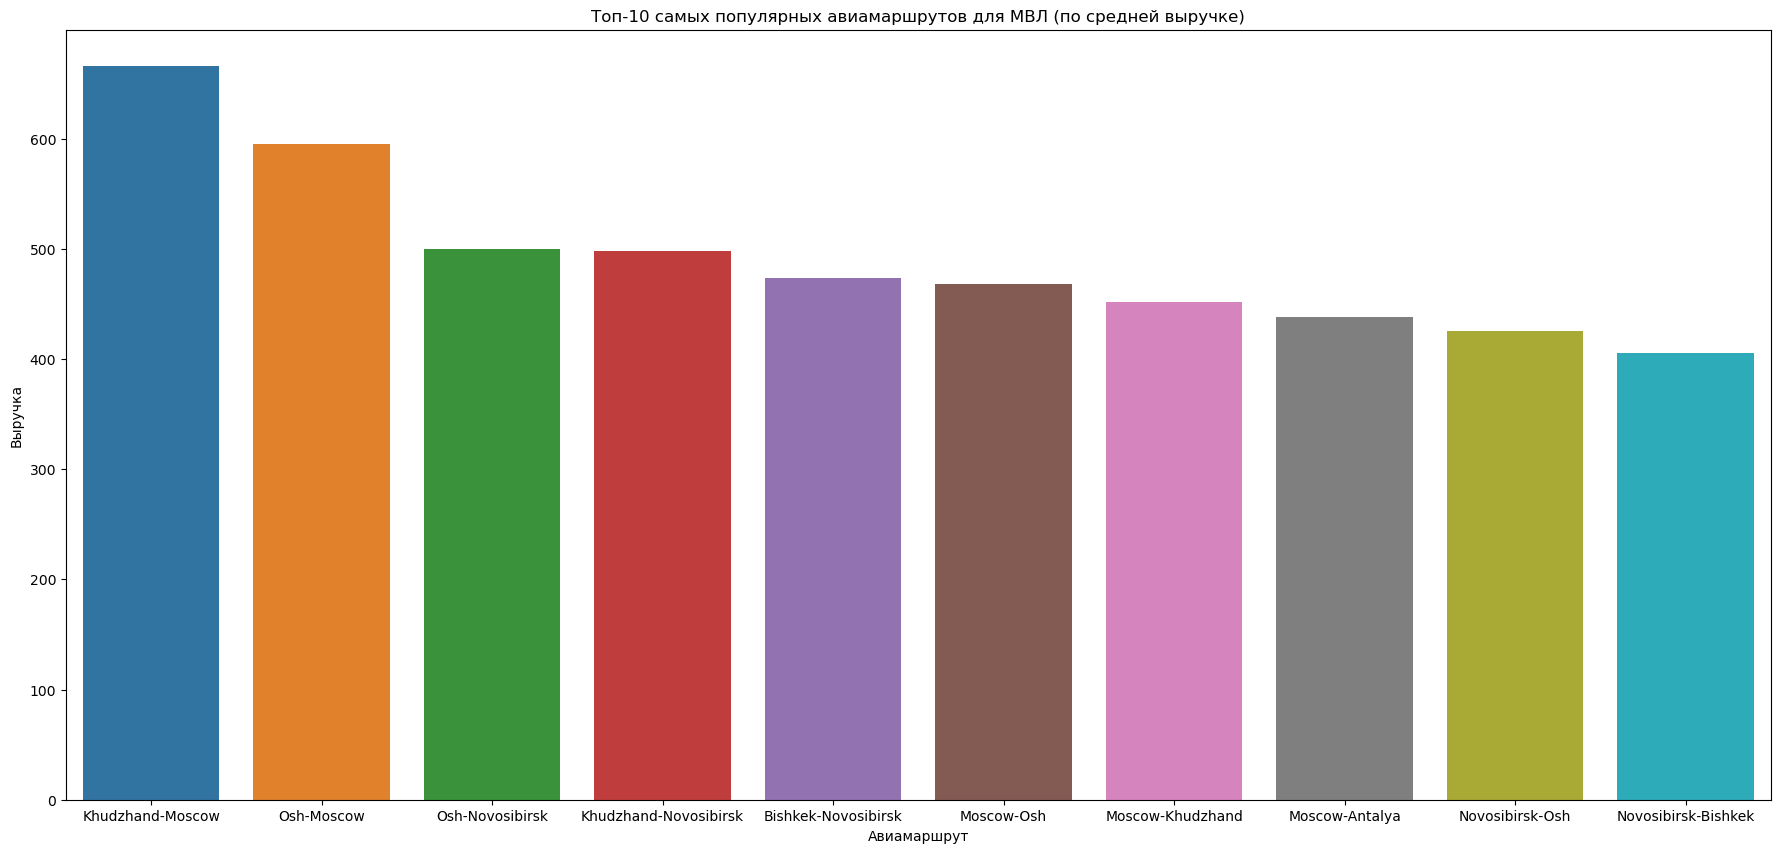

In [400]:
# Визуализируем
plt.figure(figsize = (22, 10))
sns.barplot(data=outer_top_mean.sort_values(by='revenue_amount', ascending=False).head(10),
            x='route', 
            y='revenue_amount')
plt.title('Топ-10 самых популярных авиамаршрутов для МВЛ (по средней выручке)')
plt.xlabel('Авиамаршрут')
plt.ylabel('Выручка')
plt.show()

<div class="alert alert-block alert-success">    Самыми распространенными международными рейсами являются: Москва-Ош, Москва-Худжанд и обратно. <br> В принципе международные рейсы чаще всего летят в азиатские страны из Москвы или Новосибирска. <br> По этим же направлениям (Москва-Ош, Москва-Худжанд) самая большая выручка (не только общая, но и средняя). 

<div class="alert alert-block alert-info"> 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

In [414]:
data.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,not_paticipant,ONLINE,12,35
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,not_paticipant,OFFLINE,12,3
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,37
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,not_paticipant,ONLINE,12,28
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,35


In [415]:
# Факторы по всем столбцам
data = data.apply( lambda x: pd.factorize (x)[ 0 ])

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49363 entries, 0 to 49364
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   issue_date          49363 non-null  int64
 1   flight_date_loc     49363 non-null  int64
 2   pax_type            49363 non-null  int64
 3   revenue_amount      49363 non-null  int64
 4   orig_city_code      49363 non-null  int64
 5   dest_city_code      49363 non-null  int64
 6   route_flight_type   49363 non-null  int64
 7   ffp_flag            49363 non-null  int64
 8   sale_type           49363 non-null  int64
 9   month               49363 non-null  int64
 10  days_before_flight  49363 non-null  int64
dtypes: int64(11)
memory usage: 4.5 MB


In [418]:

corr_matrix = data.corr(method = 'kendall')
corr_matrix


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,days_before_flight
issue_date,1.000000,0.136788,0.005382,0.041392,0.003944,-0.018881,-0.059890,-0.026648,-0.003587,0.497303,0.014202
flight_date_loc,0.136788,1.000000,-0.009448,0.015702,-0.000266,-0.010943,-0.027388,0.000189,0.019211,0.167636,0.016989
pax_type,0.005382,-0.009448,1.000000,-0.028628,0.009150,-0.001613,0.039956,-0.159564,-0.053451,-0.001572,0.013616
revenue_amount,0.041392,0.015702,-0.028628,1.000000,0.058242,-0.009852,0.048965,-0.017893,0.083915,0.039974,0.000066
orig_city_code,0.003944,-0.000266,0.009150,0.058242,1.000000,-0.409586,0.121432,-0.038331,0.047935,0.005787,-0.006928
dest_city_code,-0.018881,-0.010943,-0.001613,-0.009852,-0.409586,1.000000,0.116432,-0.040265,0.024459,-0.026406,-0.005494
route_flight_type,-0.059890,-0.027388,0.039956,0.048965,0.121432,0.116432,1.000000,-0.159778,0.102861,-0.092186,-0.035929
ffp_flag,-0.026648,0.000189,-0.159564,-0.017893,-0.038331,-0.040265,-0.159778,1.000000,-0.320561,-0.019310,0.004484
sale_type,-0.003587,0.019211,-0.053451,0.083915,0.047935,0.024459,0.102861,-0.320561,1.000000,0.007265,-0.027368
month,0.497303,0.167636,-0.001572,0.039974,0.005787,-0.026406,-0.092186,-0.019310,0.007265,1.000000,0.015355


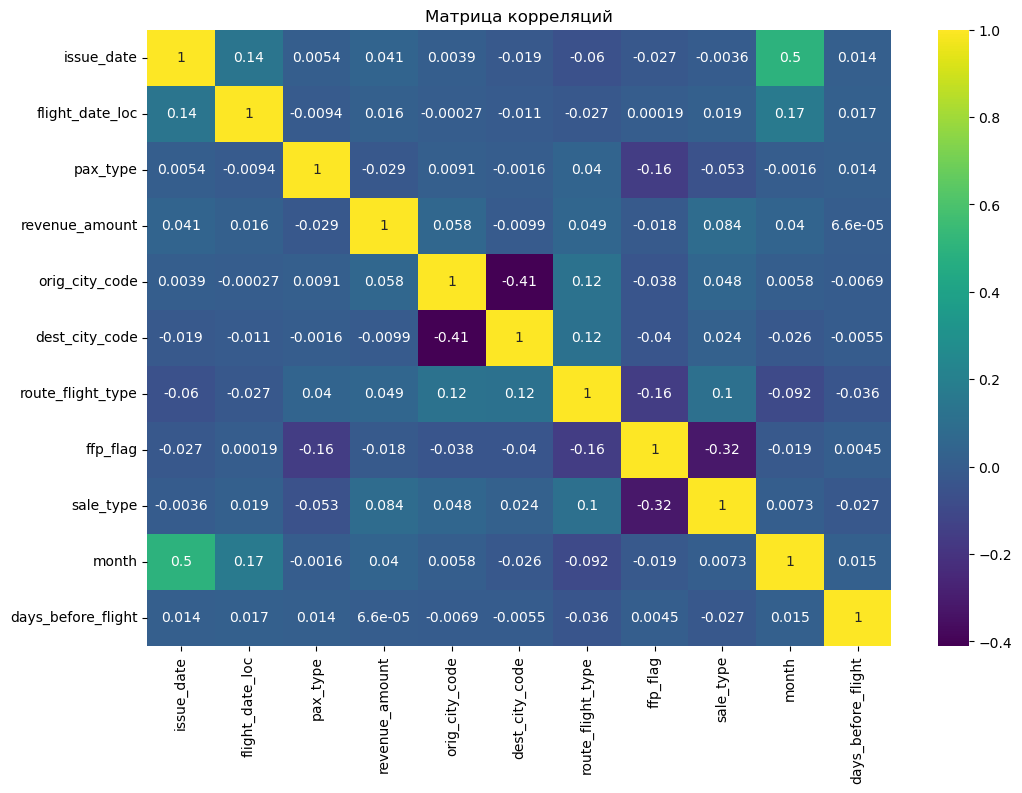

In [421]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Матрица корреляций')
plt.show()

<div class="alert alert-block alert-warning">
Связь между выручкой и другими факторами слабая.
<br> Между некоторыми факторами она обратная.

In [422]:
coll = ['pax_type', 'orig_city_code', 'dest_city_code', 'route_flight_type','ffp_flag', 'sale_type']

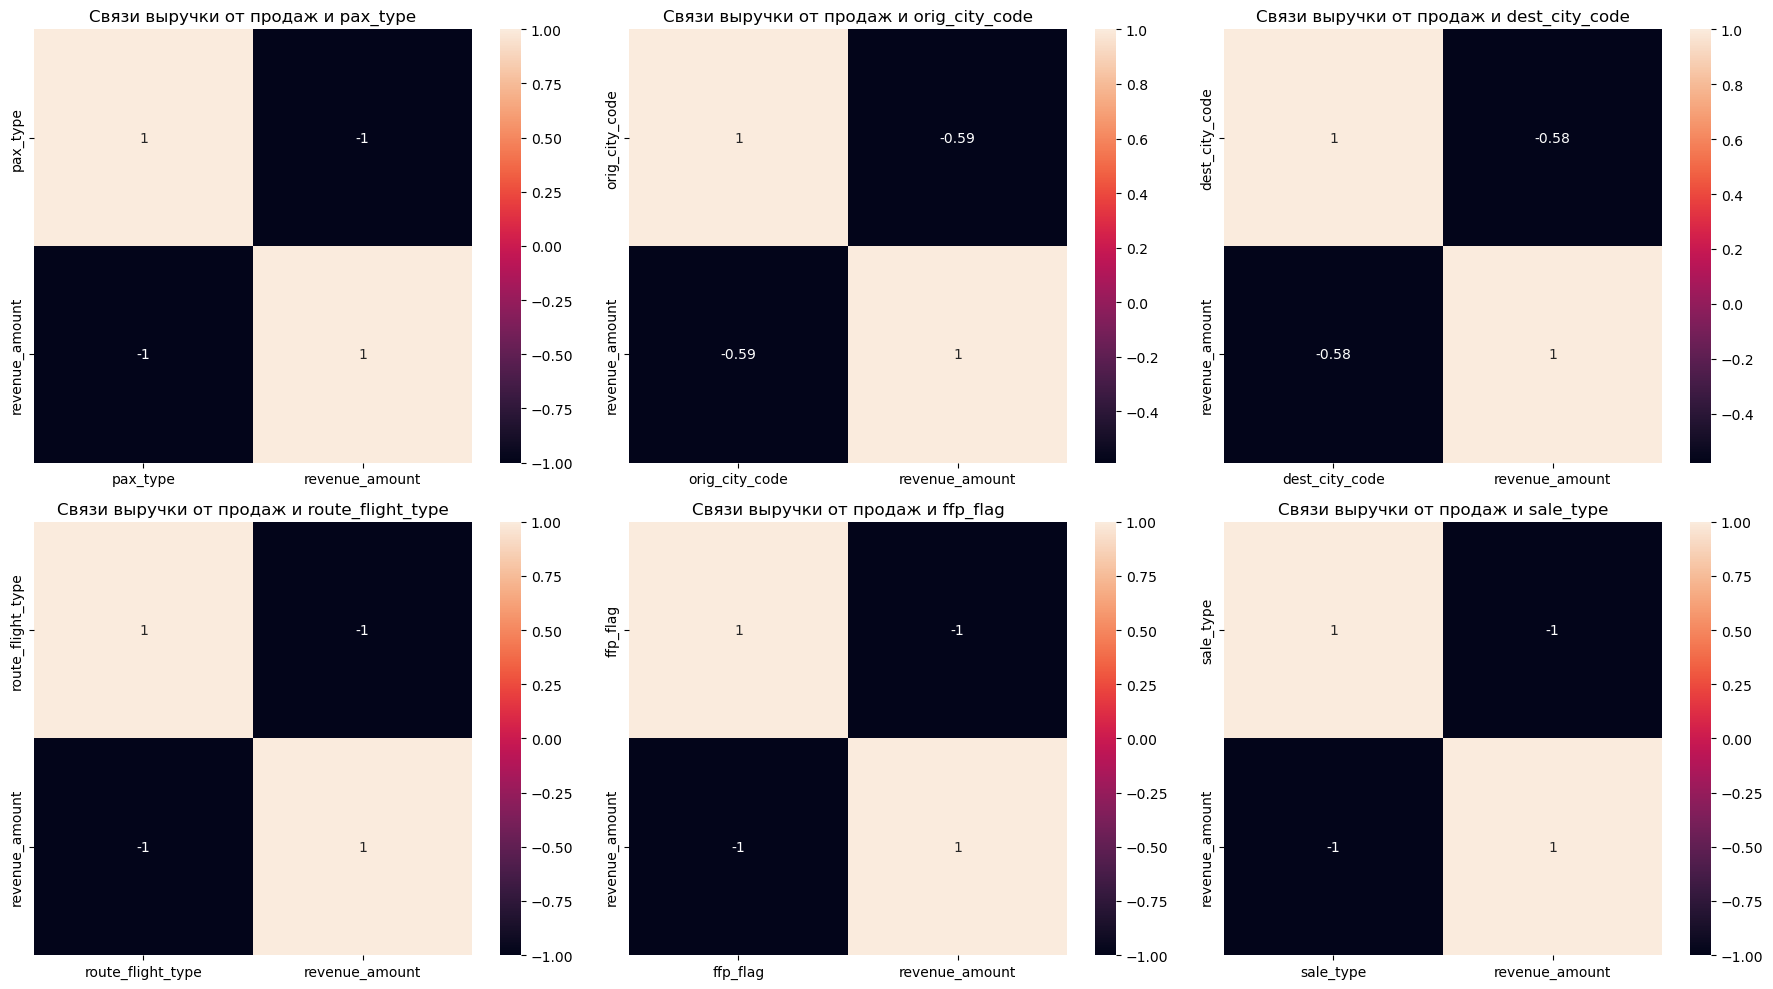

In [424]:
# Возьмем для построения корреляции коэффициент Кенделла
fig, ax = plt.subplots(2,3, figsize=(18,10))

for item, i in zip(coll,ax.ravel()):
    corr = sns.heatmap(data.groupby(by = item).revenue_amount.sum().reset_index().corr(method = 'kendall'), annot = True, ax = i)
    corr.set(title = f'Связи выручки от продаж и {item}')
plt.tight_layout()

<div class="alert alert-block alert-warning">
По значениям в других группах связь есть.
<br> Где-то связь обратная.

# Вывод по всей работе:
1. Познакомилась с данными и выполнила предобработку.
2. Произвела отчеты по выручке, исходя из несколько показателей. Ну и просто отчеты.
3. Проверила зависимость выручки от разных факторов. Также сделала проверку корреляцией.
4. Провела несколько t-тестов, анализировала разные группы.
5. Долго мучалась с месяцами, все равно с нечисловыми значениямми получалось все в разбой, так что оставила месяца числами, думаю, что это не совсем критично.
6. Перетащила данные из одного датасета в другой и сделала анализ по городам (можно в принципе было восстановить значения в пропусках, но это долго)
7. Сделала страшную матрицу корреляций (даже звучит страшно, спасибо интернету за помощь)


# Обратная связь:
Данные в принципе норм, да и задания почти все. Некоторые мелочи и глупые ошибки заставили попотеть, потратить много времени, открыть старые файлы с работами и интернет. 

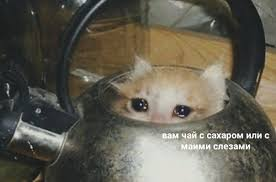